In [1]:
import numpy as np
import pandas as pd

In [4]:
data=pd.read_csv('creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print(data.shape)

(284807, 31)


In [8]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

In [9]:
outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)


0.0017304750013189597


In [10]:
corrmat=data.corr()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
fig = plt.figure(figsize = (12, 9))

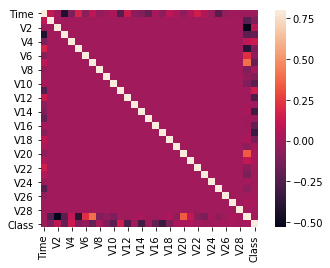

In [15]:
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca=PCA(n_components=10)
Y=data['Class']
y=Y.values
x=pca.fit_transform(data)

In [19]:
print(x.shape)
print(y.shape)

(284807, 10)
(284807,)


In [20]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
yPred = rfc.predict(xTest)

In [25]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 
  
acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

The model used is Random Forest classifier
The accuracy is 0.9992626663389628
The precision is 1.0
The recall is 0.5714285714285714
The F1-Score is 0.7272727272727273
The Matthews correlation coefficient is 0.7556499343495677


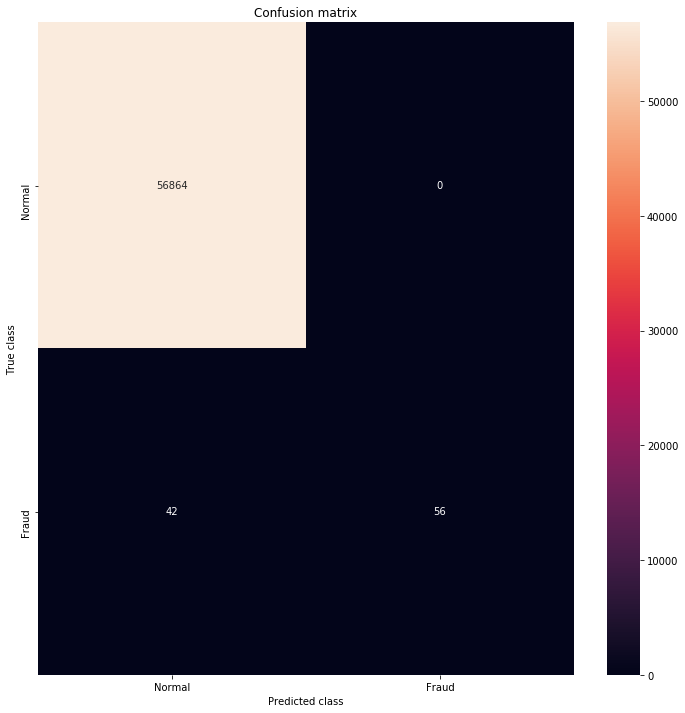

In [31]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
 yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()